##### FEATURE ENGINEERNG

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_data= pd.read_csv(r"C:\Users\yomol\train_data.csv")
historical_data=pd.read_csv(r"C:\Users\yomol\train_data.csv")

In [3]:
historical_data.head()

,Unnamed: 0,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,0,48ada52261e7cf58715202705a0451c9,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,...,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,1,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,2,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,3,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,4,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


In [4]:
train_data.head()

,Unnamed: 0,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,0,48ada52261e7cf58715202705a0451c9,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,...,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,1,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,2,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,3,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,4,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


##### Handling Categorical Features

In [5]:
# we can see that has gas is a  categorical feild and will require converting to numerical value for use in modelling.
# We will use the one-hot encoding method to achieve this
 
train_data = pd.get_dummies(train_data, columns=["has_gas"])


In [6]:
train_data.head()

,Unnamed: 0,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,has_gas_f,has_gas_t
0,0,48ada52261e7cf58715202705a0451c9,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,...,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0,1,0
1,1,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,0,1
2,2,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,1,0
3,3,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,1,0
4,4,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,1,0


#### FEATURE ENGINEERING

Using the HeatMap to determine correlations between the features

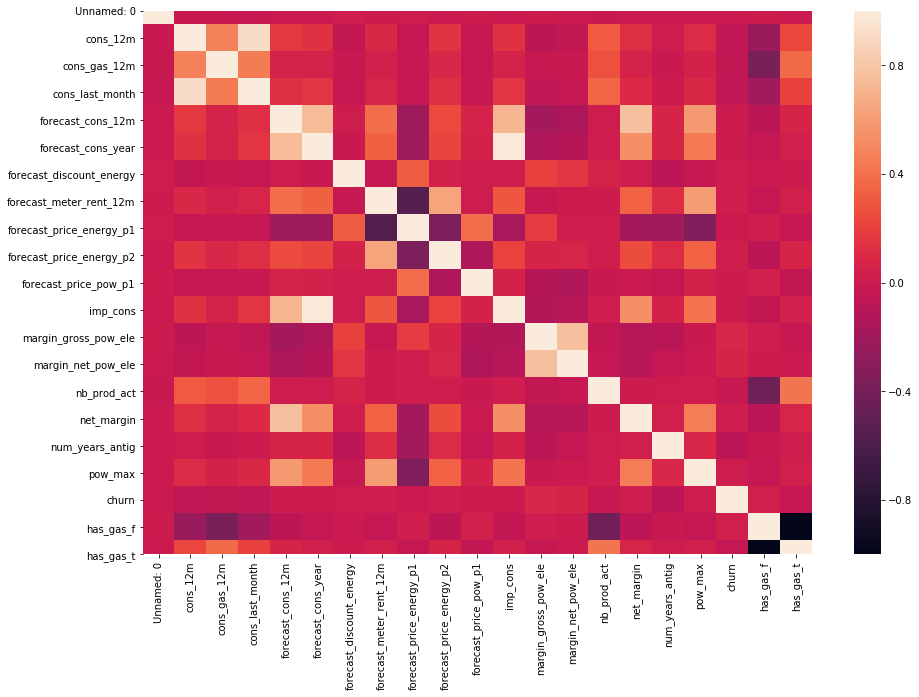

In [7]:
# We use heatmap to understand the correlations between data and to know the features to select. 

plt.figure(figsize = (15,10))
sns.heatmap(train_data.corr())

from the above heatmap, we can see that features like consumptions(cons_12m, cons_gas_12m, cons_last_month), forecast_price_energy_p1, forecast_price_pow_p1, imp_cons, nb_prod_act, num_years_antig, has_gas_t are moving towards the negative correlation with churn. 

###### Selecting features and transforming features 

We select features that have negative correlations for classification problems. This features based on domain knowledge also will influence churn. 

In [8]:

features = ['cons_12m', 'cons_gas_12m', 'cons_last_month','num_years_antig','has_gas_t','imp_cons','nb_prod_act']
x = train_data.loc[:, features].values

In [9]:
y = train_data.loc[:,['churn']].values


In [10]:
x = StandardScaler().fit_transform(x)


In [11]:
pd.DataFrame(data = x, columns = features).head()

,cons_12m,cons_gas_12m,cons_last_month,num_years_antig,has_gas_t,imp_cons,nb_prod_act
0,0.168465,-0.17970,-0.114585,-1.211557,-0.475088,1.285879,-0.238250
1,-0.286690,0.12971,-0.236315,-1.211557,2.104875,-0.396729,0.446793
2,-0.279832,-0.17970,-0.236315,0.578367,-0.475088,-0.396729,-0.238250
3,-0.285890,-0.17970,-0.236315,0.578367,-0.475088,-0.396729,-0.238250
4,-0.284359,-0.17970,-0.236315,0.578367,-0.475088,-0.396729,-0.238250


#### Principal component analysis

In [12]:
# We do the pca based on the number of features

pca = PCA(n_components=7)

In [13]:
principalComponents = pca.fit_transform(x)


In [14]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5','principal component 6','principal component 7'])

In [15]:
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7
0,-0.144117,0.850912,0.746627,1.441546,-0.137847,-0.158860,-0.230356
1,0.561741,-1.968471,0.497515,0.974107,0.271696,0.970023,0.093009
2,-0.634370,0.133943,-0.291004,-0.638705,0.019668,-0.163018,0.029344
3,-0.637598,0.132051,-0.291998,-0.637530,0.020155,-0.164412,0.033604
4,-0.636782,0.132529,-0.291747,-0.637827,0.020032,-0.164060,0.032527


In [16]:
train_data[['churn']].head()

,churn
0,0
1,1
2,0
3,0
4,0


In [17]:
final_train_data = pd.concat([principalDf, train_data[['churn']]], axis = 1)
final_train_data

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,churn
0,-0.144117,0.850912,0.746627,1.441546,-0.137847,-0.158860,-0.230356,0
1,0.561741,-1.968471,0.497515,0.974107,0.271696,0.970023,0.093009,1
2,-0.634370,0.133943,-0.291004,-0.638705,0.019668,-0.163018,0.029344,0
3,-0.637598,0.132051,-0.291998,-0.637530,0.020155,-0.164412,0.033604,0
4,-0.636782,0.132529,-0.291747,-0.637827,0.020032,-0.164060,0.032527,0
...,...,...,...,...,...,...,...,...
16091,0.576346,-1.853321,-0.007782,0.675284,0.263965,0.995175,0.061267,0
16092,-0.645676,-0.134718,1.233958,0.256451,-0.052476,-0.140915,0.020663,1
16093,-0.643249,-0.039660,0.719385,-0.029007,-0.028282,-0.150975,0.028531,1
16094,-0.656336,-0.154479,1.243214,0.233612,-0.050689,-0.140944,0.026897,0


###### Visualising the principal components

In [18]:
def principal_component_plot(pc1,pc2):
    
    
    fig = plt.figure(figsize = (8,8))
    ax  = fig.add_subplot(1,1,1) 
   
    ax.set_xlabel(pc1, fontsize = 15)

    ax.set_ylabel(pc2, fontsize = 15)


    ax.set_title('2 Component PCA', fontsize = 20)
    
    targets = [0,1]

    colors = ['r','g']
    
 

    for target, color in zip(targets,colors):
        indicesToKeep = final_train_data['churn'] == target
        first_column = final_train_data.loc[indicesToKeep, pc1]
        second_column = final_train_data.loc[indicesToKeep, pc2]
        ax.scatter(first_column,second_column, c = color, s = 50)
               
        ax.legend(targets)
        ax.grid()
    



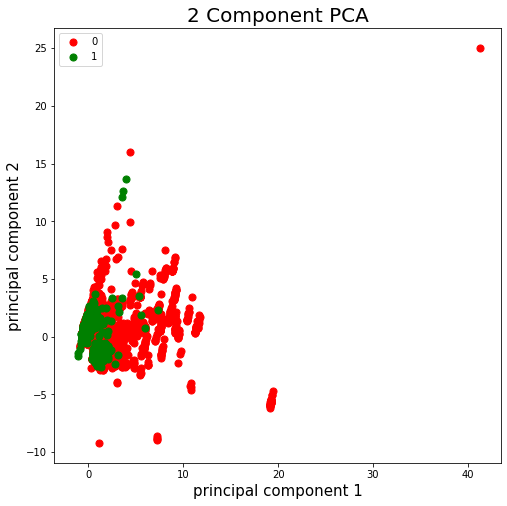

In [19]:

principal_component_plot('principal component 1','principal component 2')

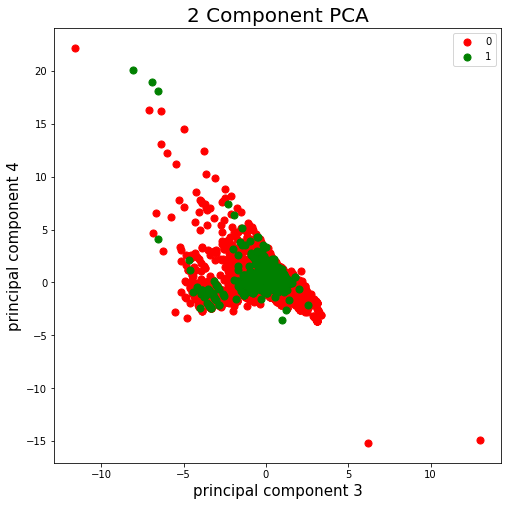

In [20]:
principal_component_plot('principal component 3','principal component 4')

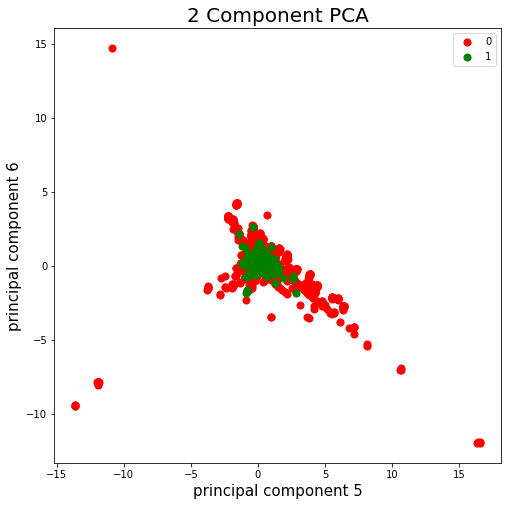

In [21]:
principal_component_plot('principal component 5','principal component 6')

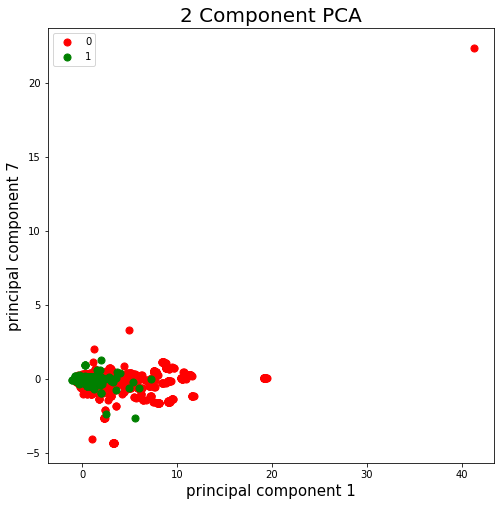

In [22]:
principal_component_plot('principal component 1','principal component 7')

In [23]:

pca.explained_variance_ratio_

array([0.38239482, 0.15993237, 0.14627705, 0.13062691, 0.09982189,
       0.06986465, 0.01108232])

##### Plotting a Scree plot

Scree plot tells us how many components to take in a PCA. 

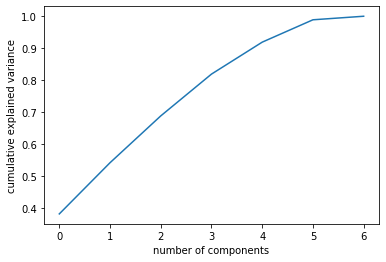

In [25]:
# Scree plot tells us how many components to take in a PCA. 

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

We will be picking three components of the PCA components. 

##### Final Data to be used in buildng the model.

In [26]:
final_train_data = final_train_data[['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5', 'churn']]

In [27]:
final_train_data

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,churn
0,-0.144117,0.850912,0.746627,1.441546,-0.137847,0
1,0.561741,-1.968471,0.497515,0.974107,0.271696,1
2,-0.634370,0.133943,-0.291004,-0.638705,0.019668,0
3,-0.637598,0.132051,-0.291998,-0.637530,0.020155,0
4,-0.636782,0.132529,-0.291747,-0.637827,0.020032,0
...,...,...,...,...,...,...
16091,0.576346,-1.853321,-0.007782,0.675284,0.263965,0
16092,-0.645676,-0.134718,1.233958,0.256451,-0.052476,1
16093,-0.643249,-0.039660,0.719385,-0.029007,-0.028282,1
16094,-0.656336,-0.154479,1.243214,0.233612,-0.050689,0


In [29]:
final_train_data.to_csv("final_train_data.csv")